In [1]:
import pandas as pd
df = pd.read_csv('data-15', sep='\t')

In [2]:
df

,Date,Time,code,value
0,04-13-1991,08:47,33,8
1,04-13-1991,08:47,34,31
2,04-13-1991,08:48,67,0
3,04-14-1991,08:27,58,275
4,04-14-1991,08:29,33,9
...,...,...,...,...
295,06-06-1991,07:18,58,213
296,06-06-1991,07:21,67,0
297,06-06-1991,07:21,33,8
298,06-06-1991,07:21,34,31


In [3]:
df.columns

Index(['Date', 'Time', 'code', 'value'], dtype='object')

In [5]:
newdf= (
    df.pivot_table(index=df.groupby('code').cumcount(),
                   columns='code',
                   values='value')
        .add_prefix('')
        .rename_axis(columns=None)
)

In [6]:
newdf

,33,34,58,59,60,62,64,65,66,67,70,71,72
0,8.0,31.0,275.0,168.0,191.0,61.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.0,31.0,50.0,87.0,NaN,253.0,71.0,0.0,NaN,0.0,0.0,NaN,0.0
2,4.0,30.0,138.0,NaN,NaN,46.0,38.0,0.0,NaN,0.0,0.0,NaN,0.0
3,5.0,6.0,72.0,NaN,NaN,213.0,89.0,0.0,NaN,0.0,NaN,NaN,NaN
4,2.0,31.0,330.0,NaN,NaN,138.0,338.0,0.0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
newdf = newdf[['33','34','58','62','64']]
newdf

,33,34,58,62,64
0,8.0,31.0,275.0,61.0,96.0
1,9.0,31.0,50.0,253.0,71.0
2,4.0,30.0,138.0,46.0,38.0
3,5.0,6.0,72.0,213.0,89.0
4,2.0,31.0,330.0,138.0,338.0
...,...,...,...,...,...
85,NaN,31.0,NaN,NaN,NaN
86,NaN,6.0,NaN,NaN,NaN
87,NaN,31.0,NaN,NaN,NaN
88,NaN,6.0,NaN,NaN,NaN


In [9]:
newdf = newdf.rename(columns={'33': 'Regular insulin dose', '34': 'NPH insulin dose',  '58':'Pre-breakfast blood glucose measurement',
                        '62':'Pre-supper blood glucose measurement', '64' : 'Pre-snack blood glucose measurement'
                        })

In [10]:
newdf

,Regular insulin dose,NPH insulin dose,Pre-breakfast blood glucose measurement,Pre-supper blood glucose measurement,Pre-snack blood glucose measurement
0,8.0,31.0,275.0,61.0,96.0
1,9.0,31.0,50.0,253.0,71.0
2,4.0,30.0,138.0,46.0,38.0
3,5.0,6.0,72.0,213.0,89.0
4,2.0,31.0,330.0,138.0,338.0
...,...,...,...,...,...
85,NaN,31.0,NaN,NaN,NaN
86,NaN,6.0,NaN,NaN,NaN
87,NaN,31.0,NaN,NaN,NaN
88,NaN,6.0,NaN,NaN,NaN


In [16]:
newdf.head()

,Regular insulin dose,NPH insulin dose,Pre-breakfast blood glucose measurement,Pre-supper blood glucose measurement,Pre-snack blood glucose measurement
0,8.0,31.0,275.0,61.0,96.0
1,9.0,31.0,50.0,253.0,71.0
2,4.0,30.0,138.0,46.0,38.0
3,5.0,6.0,72.0,213.0,89.0
4,2.0,31.0,330.0,138.0,338.0


In [17]:
newdf.mean()

Regular insulin dose                         5.440000
NPH insulin dose                            20.433333
Pre-breakfast blood glucose measurement    168.075472
Pre-supper blood glucose measurement       151.000000
Pre-snack blood glucose measurement        142.136364
dtype: float64

In [18]:
newdf.median()

Regular insulin dose                         5.0
NPH insulin dose                            31.0
Pre-breakfast blood glucose measurement    176.0
Pre-supper blood glucose measurement       142.0
Pre-snack blood glucose measurement        109.0
dtype: float64

In [19]:
from collections import Counter

for col in newdf:
  print(col, end="\t")
  c = Counter(newdf[col])
  print(c.most_common(1)[0][0])

Regular insulin dose	5.0
NPH insulin dose	31.0
Pre-breakfast blood glucose measurement	138.0
Pre-supper blood glucose measurement	61.0
Pre-snack blood glucose measurement	96.0


In [20]:
newdf.var()

Regular insulin dose                           7.141622
NPH insulin dose                             168.989888
Pre-breakfast blood glucose measurement    10918.532656
Pre-supper blood glucose measurement        8110.428571
Pre-snack blood glucose measurement         8097.932900
dtype: float64

In [21]:
newdf.std()

Regular insulin dose                         2.672381
NPH insulin dose                            12.999611
Pre-breakfast blood glucose measurement    104.491783
Pre-supper blood glucose measurement        90.057918
Pre-snack blood glucose measurement         89.988515
dtype: float64

In [22]:
newdf.cov()

,Regular insulin dose,NPH insulin dose,Pre-breakfast blood glucose measurement,Pre-supper blood glucose measurement,Pre-snack blood glucose measurement
Regular insulin dose,7.141622,0.847027,-4.242017,-14.571429,12.500000
NPH insulin dose,0.847027,168.989888,7.115385,136.785714,292.006494
Pre-breakfast blood glucose measurement,-4.242017,7.115385,10918.532656,-3965.214286,1035.344156
Pre-supper blood glucose measurement,-14.571429,136.785714,-3965.214286,8110.428571,-2065.428571
Pre-snack blood glucose measurement,12.500000,292.006494,1035.344156,-2065.428571,8097.932900


In [23]:
import seaborn as sb

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


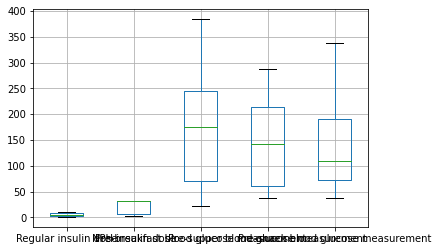

In [24]:
newdf.boxplot()

In [25]:
import numpy as np
for col in newdf:
  data = newdf[col]
  data.dropna(inplace=True)
  np.sort(data)
  Q1 = np.percentile(data, 25, interpolation = 'midpoint')
  Q3 = np.percentile(data, 75, interpolation = 'midpoint')
  IQR = Q3 - Q1
  IQR
  lower_bound = Q1 - (1.5 * IQR) 
  upper_bound = Q3 + (1.5 * IQR) 
  print("\n", col)
  print('Q1',Q1)
  print('Q3',Q3)
  print('IQR',IQR)
  print('Upper bound',upper_bound)
  print('lower_bound',lower_bound)


 Regular insulin dose
Q1 3.0
Q3 8.0
IQR 5.0
Upper bound 15.5
lower_bound -4.5

 NPH insulin dose
Q1 6.0
Q3 31.0
IQR 25.0
Upper bound 68.5
lower_bound -31.5

 Pre-breakfast blood glucose measurement
Q1 70.0
Q3 244.0
IQR 174.0
Upper bound 505.0
lower_bound -191.0

 Pre-supper blood glucose measurement
Q1 61.0
Q3 214.0
IQR 153.0
Upper bound 443.5
lower_bound -168.5

 Pre-snack blood glucose measurement
Q1 73.5
Q3 191.0
IQR 117.5
Upper bound 367.25
lower_bound -102.75


In [26]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Regular insulin dose                     75 non-null     float64
 1   NPH insulin dose                         90 non-null     float64
 2   Pre-breakfast blood glucose measurement  53 non-null     float64
 3   Pre-supper blood glucose measurement     15 non-null     float64
 4   Pre-snack blood glucose measurement      22 non-null     float64
dtypes: float64(5)
memory usage: 4.2 KB


In [27]:
df_wo_na = newdf[:15]

In [28]:
df_wo_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Regular insulin dose                     15 non-null     float64
 1   NPH insulin dose                         15 non-null     float64
 2   Pre-breakfast blood glucose measurement  15 non-null     float64
 3   Pre-supper blood glucose measurement     15 non-null     float64
 4   Pre-snack blood glucose measurement      15 non-null     float64
dtypes: float64(5)
memory usage: 720.0 bytes


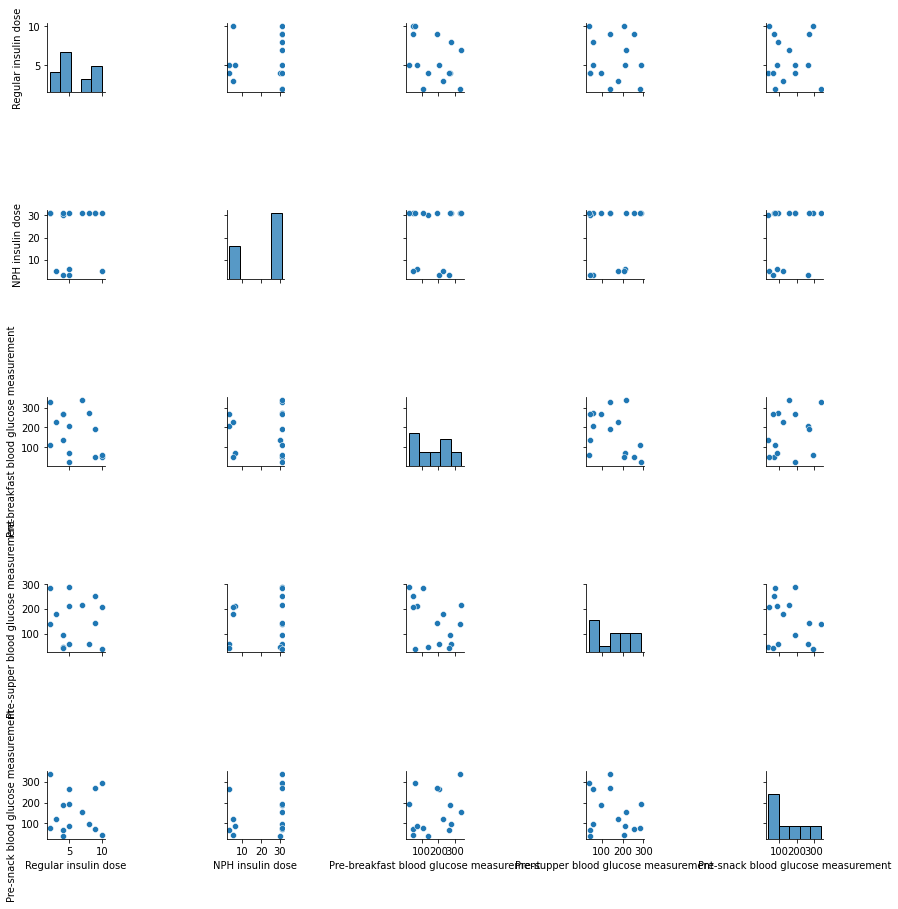

In [29]:
sb.pairplot(df_wo_na,kind='scatter')

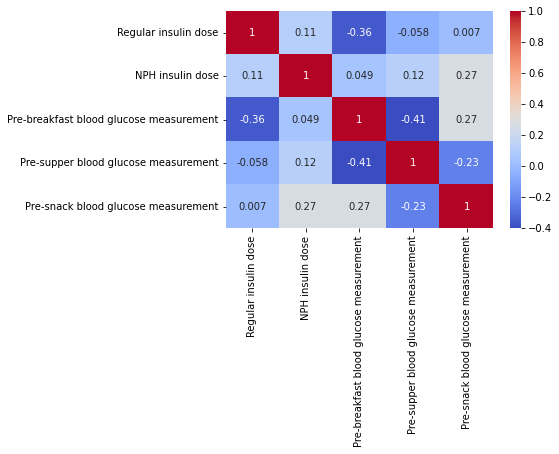

In [30]:
sb.heatmap(df_wo_na.corr(), cmap='coolwarm',annot=True)

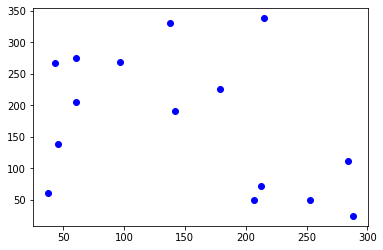

In [34]:
import matplotlib.pyplot as plt
y = (df_wo_na['Pre-breakfast blood glucose measurement'])
x = (df_wo_na['Pre-supper blood glucose measurement'])
x = x
y = y
plt.scatter(x, y,color='blue')
plt.show()

In [35]:
from sklearn.linear_model import LinearRegression
X = x.values.reshape(-1, 1)
Y = x.values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

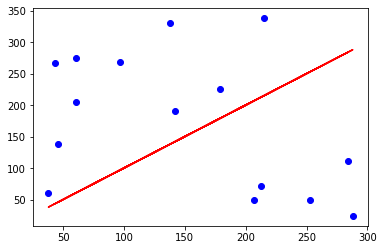

In [36]:
#plt.scatter(X, Y)
plt.scatter(x, y,color='blue')
plt.plot(X, Y_pred, color='red')
plt.show()